# Research Notebook
## Jacob Smigorosky
## Date: March 23-24 2025

# 1: Experience
## Describe at least one research activity you worked on this week. 
1. Solved Kepler Problem numerically, for the relative separation between each of 7 pairings, using a range of masses, such that the separation distance
between the pair of subhalos approached zero as time approaches zero, simulating early times in cosmic expansion.
2. Refined mass estimates for the Local Group using this technique for all 7 pairs.
3. Plotted r(t) for several pairs to confirm that separation approaches zero
4. Met with group to begin talking about our presentation, and assigned roles (will take the 'results' section)
## Motivation:
At this point we have identified 7 pairs that represent the Local Group (Milky Way and Andromeda Galaxy) by performing a series of cuts on mass, relative velocity, and isolation cuts that reflect the behavior and properties of our Local Group in the modern day (e.g relative velocity of ~100km/s), we are attempting to estimate the mass of the Local Group, which required solving the Kepler Problem, for the relative separation distance (separation vector) as a function of time, integrating backwards to t=0, which is early in the Universe's history, we then alter the mass of the local group until an ideal separation (small as possible) is achieved, and create a catalogue of masses, for each pair. 


# 2: What? (What happened?)
## Describe what happened during your activities for the week.
First we  solve Newton's second law $$\frac{d^2{r}}{dt^2}=-\frac{GM_{LG}}{r^2}\hat{r} + H_0^2\Omega_\lambda r$$
Where $r$ is the relative separation, $H_0$ is the Hubble constant, and $\Omega_\lambda$ is the dark energy density.

We solve the problem in polar coordinates. For initial conditions we use the separation distance for each pair computed from simulation data, and the relative and tangential velocities we compute by defining the radial and tangential unit vectors:
$$\hat{r} := (\vec{r_1} -\vec{r_2})/|\vec{r_1} -\vec{r_2}|$$ and the relative radial velocity is $$\vec{v_r} = \vec{v}\cdot{\hat{r}}$$, further decomposing the vector we get the tangential velocity  $$\vec{v_\theta} = \vec{v} - \vec{v_r}$$.
We then use the Runge-Kutta 45 method to numericaly solve the equation for a given mass: Using the following code:

The first function: two_body_ode_lambda(t,y,LG_mu) defines the vector equation we are solving, ie a coupled set of equations for both the radial and tangential positions, and velocities.
The second function: rk4_step uses the RK method to solve the equation numerically, by defining the step size.
The Third function: Actually numericaly solves the problem, returing a list of the radial separation values and a list of times for which the equation is evaluated.


For each subhalo pairing (one of 7) we can compute their radial and tangential velocities and  separation distances

| Subhalo Pair | Separation Distance (kpc) | Radial Velocity (km/s) | Tangential Velocity (km/s) |
|--------------|----------------------------|------------------------|----------------------------|
| 1            | 996.31116                  | -168.06435             | 333.1215                   |
| 2            | 827.5001                   | -125.50682             | 106.667564                 |
| 3            | 989.27435                  | -126.52949             | 62.450222                  |
| 4            | 639.789                    | -183.44385             | 143.26442                  |
| 5            | 805.4934                   | -66.0882               | 114.00217                  |
| 6            | 581.71173                  | -218.70978             | 38.191742                  |
| 7            | 748.4479                   | -142.15388             | 32.146065                  |

And we can use this data with MTA_lambda function to plot the radial separation over time.


The general algorithm works like this:
1) Determine an acceptable mass range (generally between 0.5e12 solar masses and 5e12 solar masses) that is comparable to observations of the Local group, then for masses within this range, solve the differential equation, determining the minimum separation distance for each mass.
2) When a minimum sep distance is found, its corresponding mass is found, and the range of masses is narrowed around this value, and step 1) is applied again, until a numerical problem occurs, or separation distances begin to increase/become negative, this creates a narrow range of masses that produce a very small separation distance at t=0.
3) For this mass value that produces the minimal sep at t=0, a plot is made to ensure the following characteristics: a) Minimal separation occurs at t=0, b) r(t) has only one pericenter (the trajectory appears somewhat as in Figure 1 below)

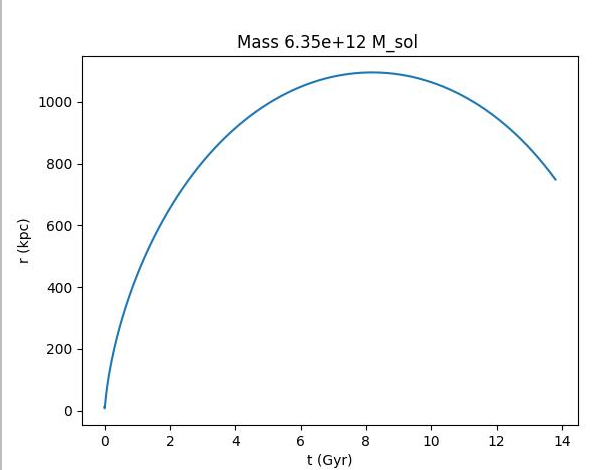


Figure 1. Plot of subhalo r(t).

This was done with multiple halos however there are several issues that need to be corrected.

# 3: So what? (What does it mean?)
## Describe your results
Although I was capable of estimating the mass for each of the 7 pairs there are several issues:
1) The first pair is an outlier in that its separation distance and tangential velocities are far higher than observed data, and this results in a mass estimate roughly an order of magnitude larger than the estimated mass of the local group, and much larger than all other pairs. So with that in mind, this data point may be rejected.
2) I did not account for hubble flow, by correcting for cosmic expansion, so that the radial velocity has an additional term + $H_0r(0)$ which will reduce the overall relative radial velocities, and bring them closer to the empirical value, and more closely align our masses with observation.
3) Mass estimations for the local group range from around 3e12 to 5e13 M_sol which is slightly larger than expected at the upper range, but this might be corrected by adding the term described above.

# 4. Now what? (What's next?)
## Plan for the next week
In the next week I must:
1) Correct relative velocity term by accounting for cosmic expansion
2) Finish estimating the mass for each pair and compare it to empirical measurements
3) Compare mass estimate to simulation mass (using dark matter mass)
4) Collaborate with group partners to finish the results section of our presentation,  by using our work, reviewing the papers we used, summarizing our findings, and preparing to give the talk.


# 5. Bibliography





[1]  O. V. Hartl and L. E. Strigari, "Local Group timing argument and virial theorem mass    estimators from cosmological simulations," *Mon. Not. R. Astron. Soc.*, vol. 511, no. 4, pp. 5517-5534, Apr. 2022, doi: 10.3847/2041-8213/ac5c42.

